# Exploratory Data Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Loading Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iranian_churn = fetch_ucirepo(id=563) 

df = iranian_churn.data.features 
df['Churn'] = iranian_churn.data.targets 
df.to_csv('../Data/raw.csv')

In [3]:
print(df.shape)
print(df.columns)
df.info()

(3150, 14)
Index(['Call  Failure', 'Complains', 'Subscription  Length', 'Charge  Amount',
       'Seconds of Use', 'Frequency of use', 'Frequency of SMS',
       'Distinct Called Numbers', 'Age Group', 'Tariff Plan', 'Status', 'Age',
       'Customer Value', 'Churn'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tar

In [4]:
df. describe().T

,count,mean,std,min,25%,50%,75%,max
Call Failure,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
Complains,3150.0,0.076508,0.265851,0.0,0.00000,0.00,0.00000,1.00
Subscription Length,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
Charge Amount,3150.0,0.942857,1.521072,0.0,0.00000,0.00,1.00000,10.00
Seconds of Use,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
Frequency of use,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
Frequency of SMS,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
Distinct Called Numbers,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
Age Group,3150.0,2.826032,0.892555,1.0,2.00000,3.00,3.00000,5.00
Tariff Plan,3150.0,1.077778,0.267864,1.0,1.00000,1.00,1.00000,2.00


In [5]:
df.sample(5)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
584,6,0,35,4,7080,122,303,37,3,2,1,30,1500.080,0
2409,7,0,34,1,4560,79,7,21,3,1,1,30,213.560,0
1770,0,0,35,0,10970,147,0,42,3,1,1,30,444.680,0
1759,0,0,36,0,4020,76,0,20,3,1,1,30,163.840,0
2332,5,0,34,1,305,6,7,2,5,1,1,55,15.165,0


| Column Name              | Description                                               | Type / Encoding                     |
|--------------------------|-----------------------------------------------------------|-------------------------------------|
| Call Failures            | Number of call failures                                   | Numeric                             |
| Complains                | Customer complaint status (0: No, 1: Yes)                 | Binary                              |
| Subscription Length      | Total months of subscription                              | Numeric                             |
| Charge Amount            | Ordinal charge amount (0: lowest, 9: highest)             | Ordinal (0–9)                       |
| Seconds of Use           | Total seconds of calls                                    | Numeric                             |
| Frequency of Use         | Total number of calls                                     | Numeric                             |
| Frequency of SMS         | Total number of SMS sent                                  | Numeric                             |
| Distinct Called Numbers  | Number of distinct phone numbers called                   | Numeric                             |
| Age Group                | Age bracket (1: youngest, 5: oldest)                      | Ordinal (1–5)                       |
| Tariff Plan              | Plan type (1: Pay-as-you-go, 2: Contractual)              | Binary                              |
| Status                   | Activity status (1: Active, 2: Non-active)                | Binary                              |
| Churn                    | Target variable (1: Churn, 0: Not churn)                  | Binary (Target)                     |
| Customer Value           | Calculated value of customer                              | Numeric (possibly derived feature)  |


In [6]:
df.rename(columns={
    'Call  Failure': 'failed_call_count',
    'Complains': 'submitted_complaint',
    'Subscription  Length': 'months_as_customer',
    'Charge  Amount': 'billing_level',
    'Seconds of Use': 'total_call_seconds',
    'Frequency of use': 'call_count',
    'Frequency of SMS': 'sms_count',
    'Distinct Called Numbers': 'unique_contacts_called',
    'Age Group': 'age_bracket',
    'Tariff Plan': 'plan_type',
    'Status': 'account_status',
    'Age': 'age',
    'Customer Value': 'customer_value',
    'Churn': 'has_churned'
}, inplace=True)


In [8]:
df_cleaned = df[[
    'failed_call_count',
    'submitted_complaint',
    'months_as_customer',
    'billing_level',
    'call_count',
    'sms_count',
    'plan_type',
    'account_status',
    'age',
    'customer_value',
    'has_churned'
]]
df_cleaned.to_csv('../Data/cleaned.csv')

In [9]:
df["submitted_complaint"] = df["submitted_complaint"].map({0: "No", 1: "Yes"})
df["plan_type"] = df["plan_type"].map({1: "Pay as you go", 2: "Contractual"})
df["account_status"] = df["account_status"].map({1: "Active", 2: "No active"})
df["has_churned"] = df["has_churned"].map({0: "No Churn", 1: "Churn"})
df['billing_level'] = df["billing_level"].map({
    0: "Very Low",
    1: "Low",
    2: "Mid-Low",
    3: "Medium",
    4: "Mid-High",
    5: "High",
    6: "High+",
    7: "Very High",
    8: "Premium",
    9: "VIP"
})
df['age_bracket'] = df['age_bracket'].map({
    1: "Young Adult",
    2: "Adult",
    3: "Middle Age",
    4: "Mature Adult",
    5: "Senior"
})


In [10]:
describe_con = df.describe().T
describe_con.to_csv('../Outputs/Tables/variables_continuous_describe.csv')
describe_con

,count,mean,std,min,25%,50%,75%,max
failed_call_count,3150.0,7.627937,7.263886,0.0,1.00000,6.00,12.00000,36.00
months_as_customer,3150.0,32.541905,8.573482,3.0,30.00000,35.00,38.00000,47.00
total_call_seconds,3150.0,4472.459683,4197.908687,0.0,1391.25000,2990.00,6478.25000,17090.00
call_count,3150.0,69.460635,57.413308,0.0,27.00000,54.00,95.00000,255.00
sms_count,3150.0,73.174921,112.237560,0.0,6.00000,21.00,87.00000,522.00
unique_contacts_called,3150.0,23.509841,17.217337,0.0,10.00000,21.00,34.00000,97.00
age,3150.0,30.998413,8.831095,15.0,25.00000,30.00,30.00000,55.00
customer_value,3150.0,470.972916,517.015433,0.0,113.80125,228.48,788.38875,2165.28


In [11]:
describe_dis = df.describe(include=[object]).T
describe_dis.to_csv('../Outputs/Tables/variables_descritive_describe.csv')
describe_dis

,count,unique,top,freq
submitted_complaint,3150,2,No,2909
billing_level,3143,10,Very Low,1768
age_bracket,3150,5,Middle Age,1425
plan_type,3150,2,Pay as you go,2905
account_status,3150,2,Active,2368
has_churned,3150,2,No Churn,2655


In [12]:
df.sample(5).T

,85,2197,3101,1807,1075
failed_call_count,5,16,5,6,0
submitted_complaint,No,No,No,No,No
months_as_customer,38,20,41,30,32
billing_level,Low,High,Very Low,Very Low,Very Low
total_call_seconds,3778,3218,623,8810,2535
call_count,85,54,11,109,16
sms_count,7,43,14,129,0
unique_contacts_called,30,23,6,40,12
age_bracket,Middle Age,Middle Age,Middle Age,Middle Age,Middle Age
plan_type,Pay as you go,Contractual,Pay as you go,Pay as you go,Pay as you go


In [13]:
df.to_csv('../Data/viz_ready.csv', index=False)

## Visulization

In [14]:
df = pd.read_csv('../Data/viz_ready.csv')
plt.style.use("Solarize_Light2")
fig_facecolor = "#fdf6e3bd"
ax_facecolor = "#eee8d5"

### Univariable

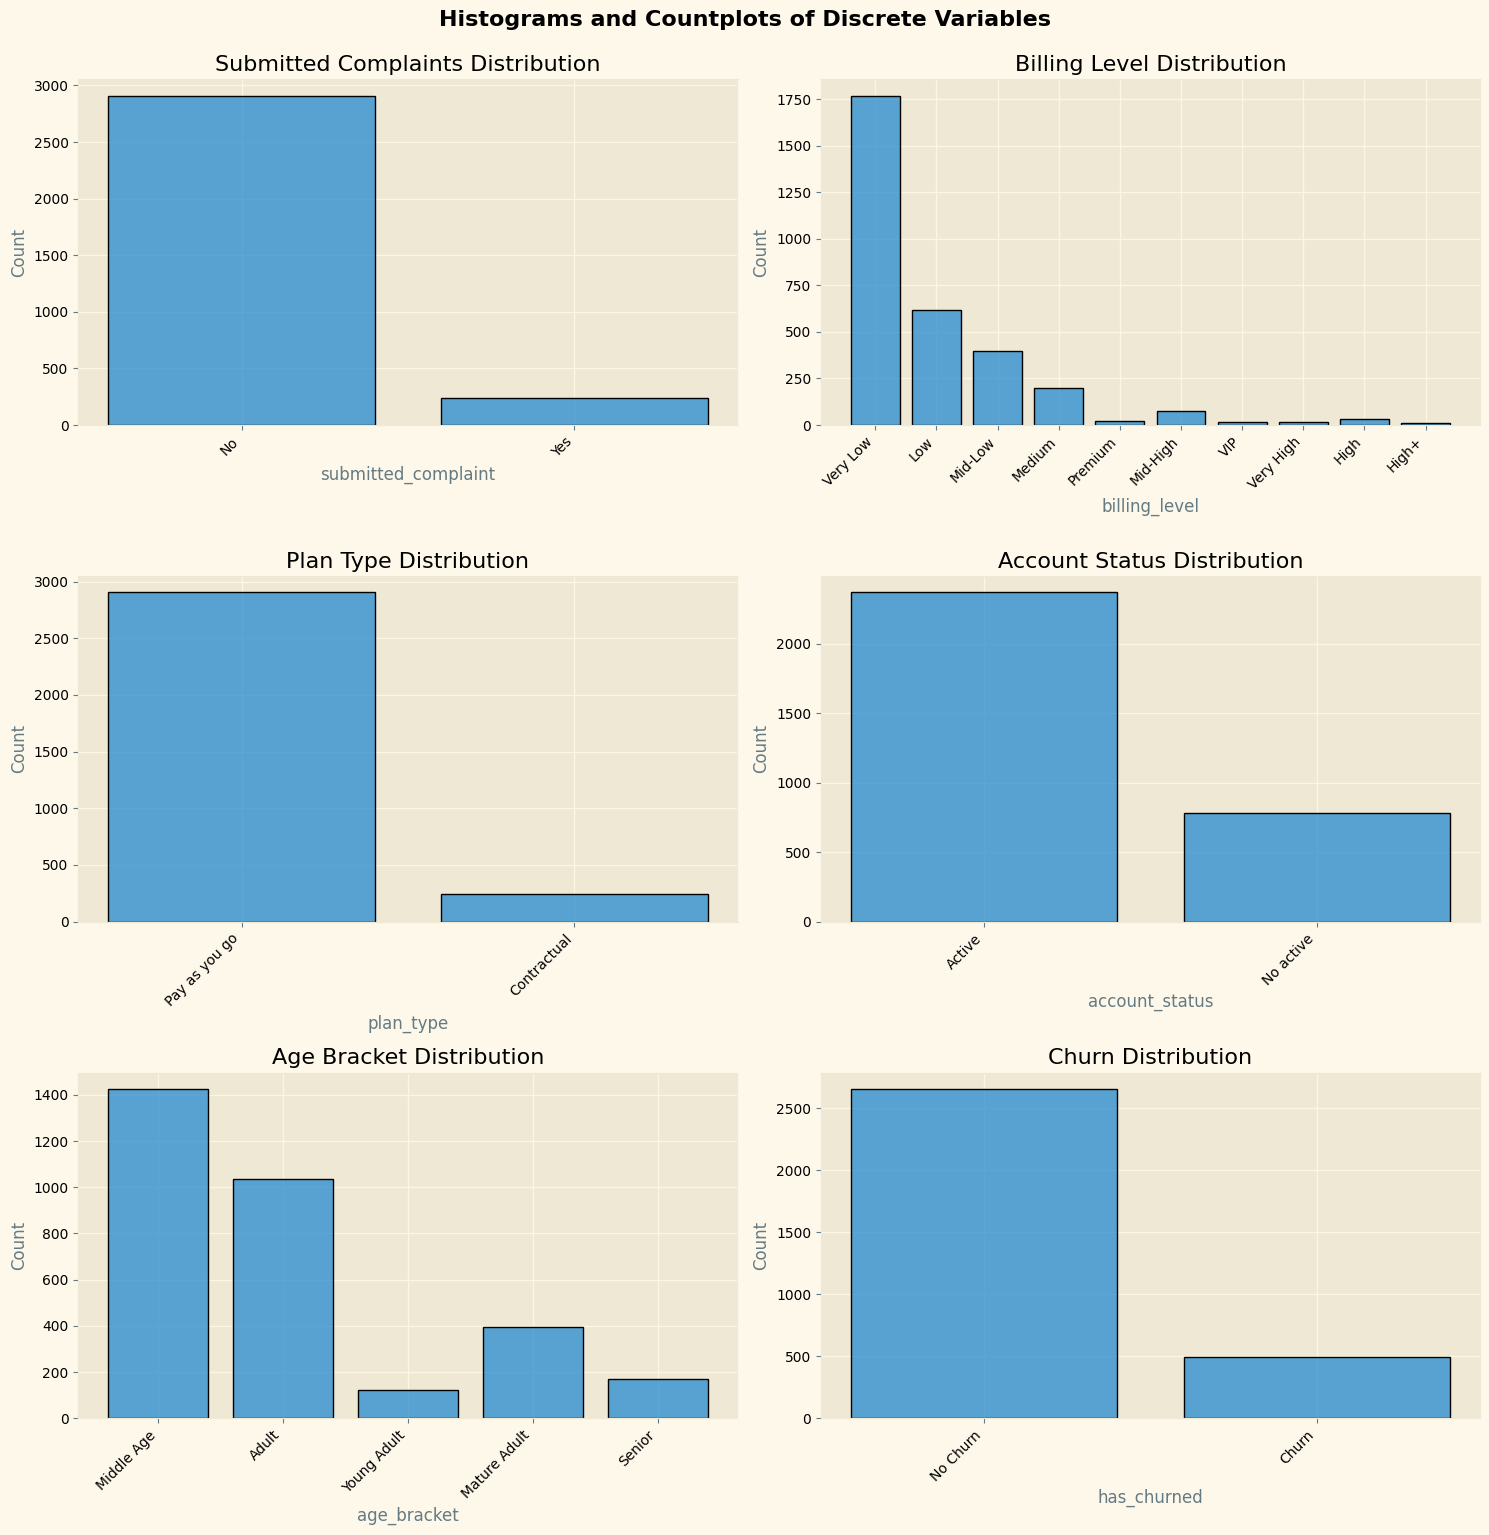

In [15]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15), facecolor=fig_facecolor)

sns.histplot(df['submitted_complaint'], bins=30, shrink=0.8, ax=axes[0, 0])
axes[0, 0].set_title("Submitted Complaints Distribution")

sns.histplot(df['billing_level'], bins=30, shrink=0.8, ax=axes[0, 1])
axes[0, 1].set_title("Billing Level Distribution")

sns.histplot(df['plan_type'], bins=30, shrink=0.8, ax=axes[1, 0])
axes[1, 0].set_title("Plan Type Distribution")

sns.histplot(df['account_status'], bins=30, shrink=0.8, ax=axes[1, 1])
axes[1, 1].set_title("Account Status Distribution")

sns.histplot(df['has_churned'], bins=30, shrink=0.8, ax=axes[2, 1])
axes[2, 1].set_title("Churn Distribution")

sns.histplot(df['age_bracket'], bins=30, shrink=0.8, ax=axes[2, 0])
axes[2, 0].set_title("Age Bracket Distribution")

for ax in axes.flat:
    ax.set_facecolor(ax_facecolor)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
        label.set_color('black')
        
    for label in ax.get_yticklabels():
        label.set_color('black')

plt.tight_layout()
plt.suptitle("Histograms and Countplots of Discrete Variables", fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../Outputs/Figures/histplots_discrete.png')
plt.show()


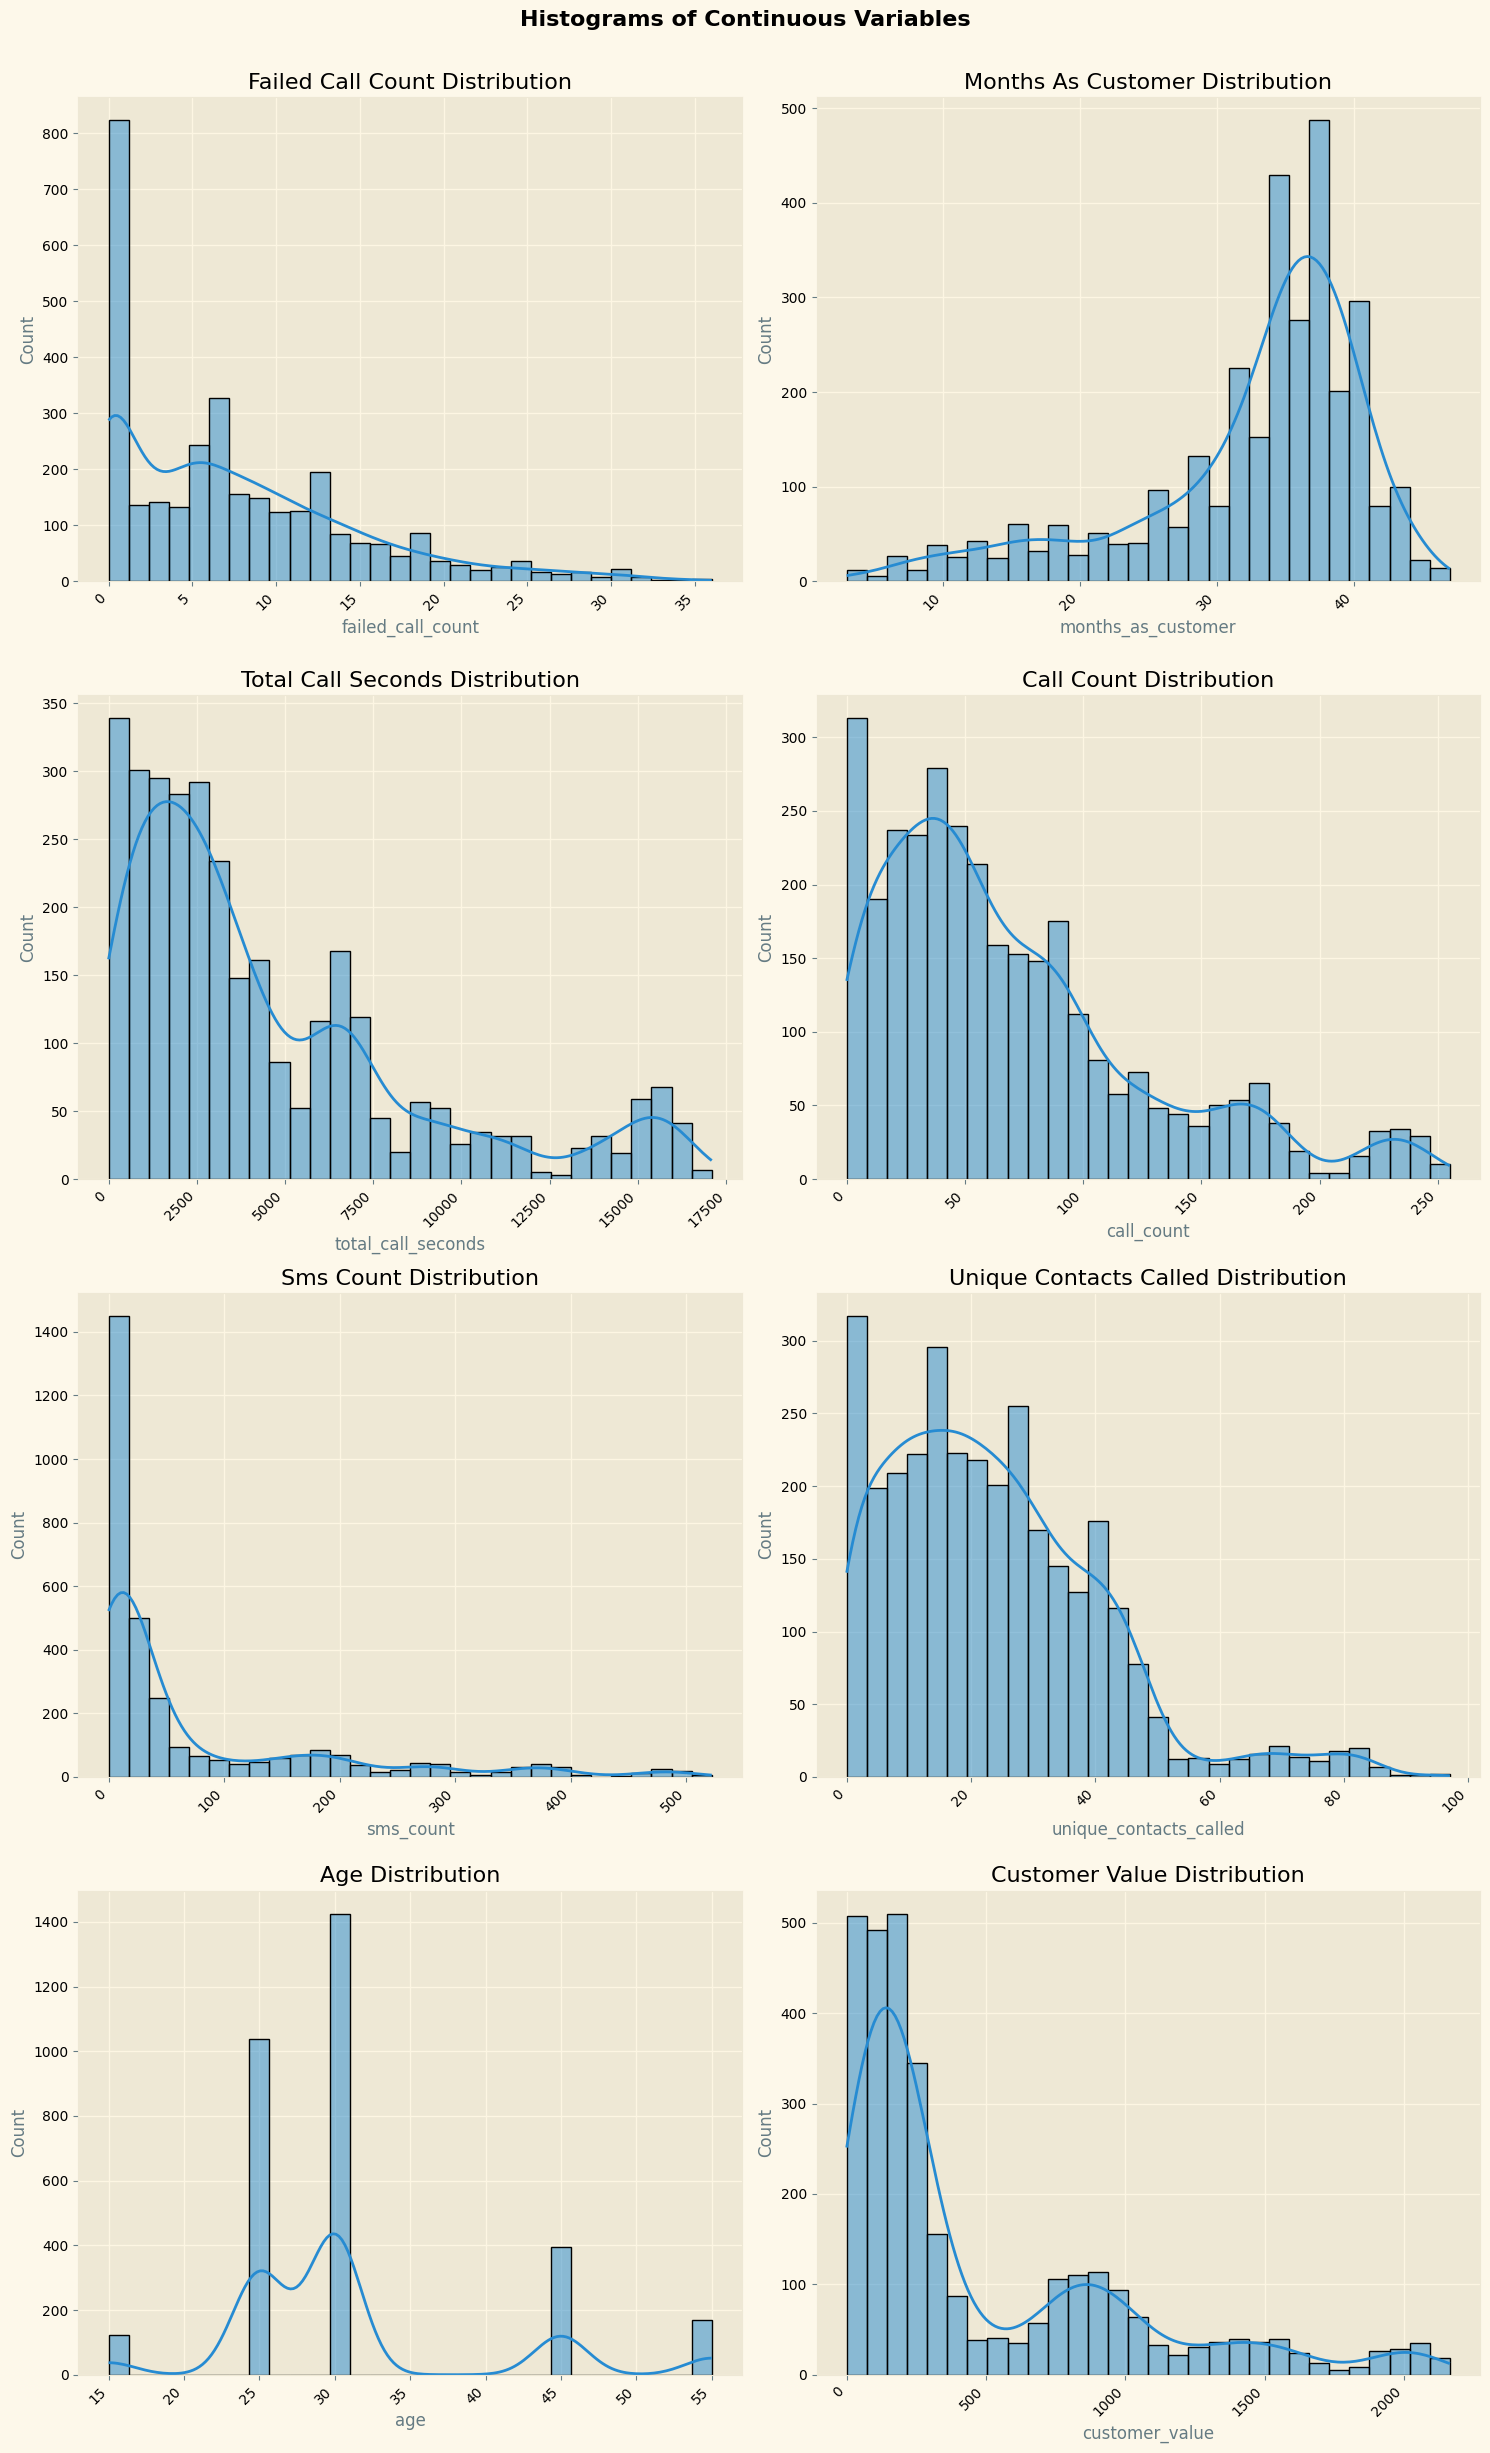

In [16]:
cols = df.describe().columns.tolist()
n = len(cols)

fig, axes = plt.subplots(n // 2, 2, figsize=(15, 3 * n), facecolor=fig_facecolor)

for i, col in enumerate(cols):
    r, c = divmod(i, 2)
    sns.histplot(df[col], bins=30, kde=True, ax=axes[r, c])
    name = col.replace('_', ' ').title() + " Distribution"
    axes[r, c].set_title(name)

for ax in axes.flat:
    ax.set_facecolor(ax_facecolor)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
        label.set_color('black')
        
    for label in ax.get_yticklabels():
        label.set_color('black')

plt.tight_layout()
plt.suptitle("Histograms of Continuous Variables", fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../Outputs/Figures/histplots_continuous.png')
plt.show()

### Univariable with Churn

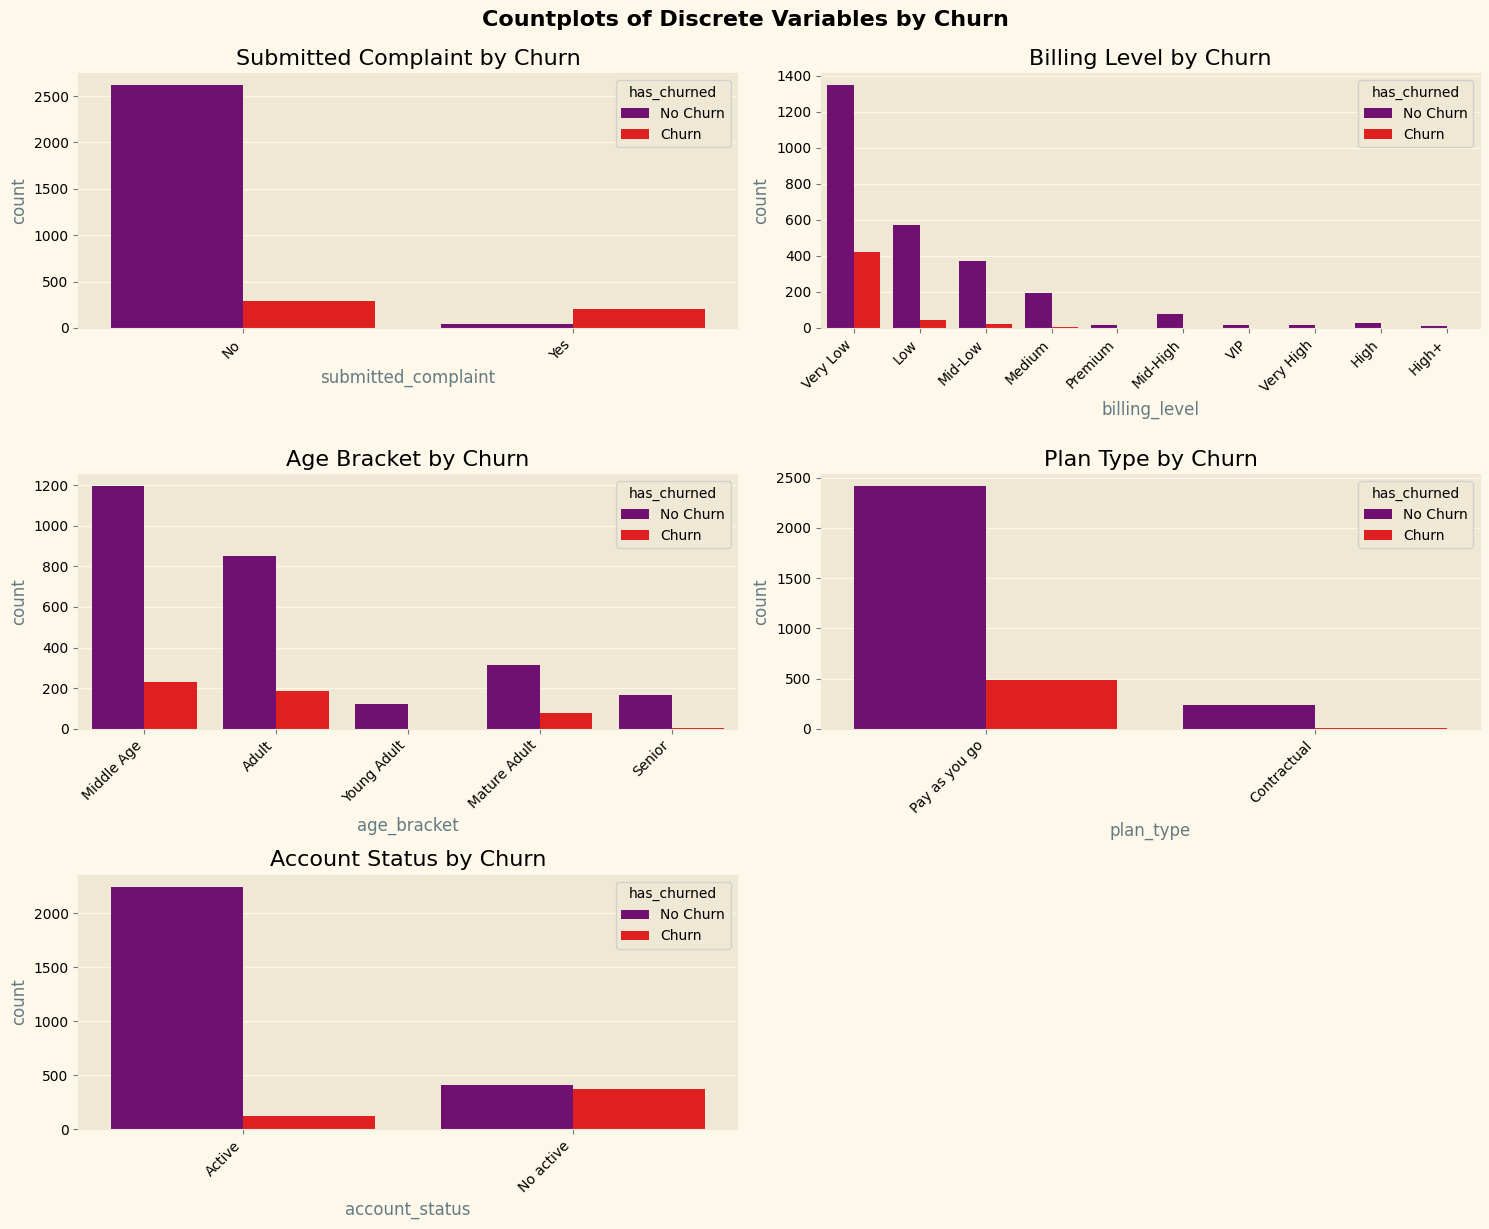

In [17]:
cols_dis = [x for x in df.columns.tolist() if x not in cols and x != 'has_churned']
n = len(cols_dis)
n_rows = math.ceil(n / 2)

fig, axes = plt.subplots(n_rows, 2, figsize=(15, 4 * n_rows), facecolor=fig_facecolor)

for i, col in enumerate(cols_dis):
    r, c = divmod(i, 2)
    sns.countplot(
        data=df,
        x=col,
        hue='has_churned',
        ax=axes[r, c],
        palette={'No Churn': 'purple', 'Churn': 'red'}
    )
    title = col.replace('_', ' ').title() + ' by Churn'
    axes[r, c].set_title(title)

for j in range(len(cols_dis), n_rows * 2):
    r, c = divmod(j, 2)
    fig.delaxes(axes[r, c])

for ax in axes.flat:
    ax.set_facecolor(ax_facecolor)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
        label.set_color('black')
        
    for label in ax.get_yticklabels():
        label.set_color('black')

plt.tight_layout()
plt.suptitle("Countplots of Discrete Variables by Churn", fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../Outputs/Figures/countplots_discrete_by_churn.png')
plt.show()

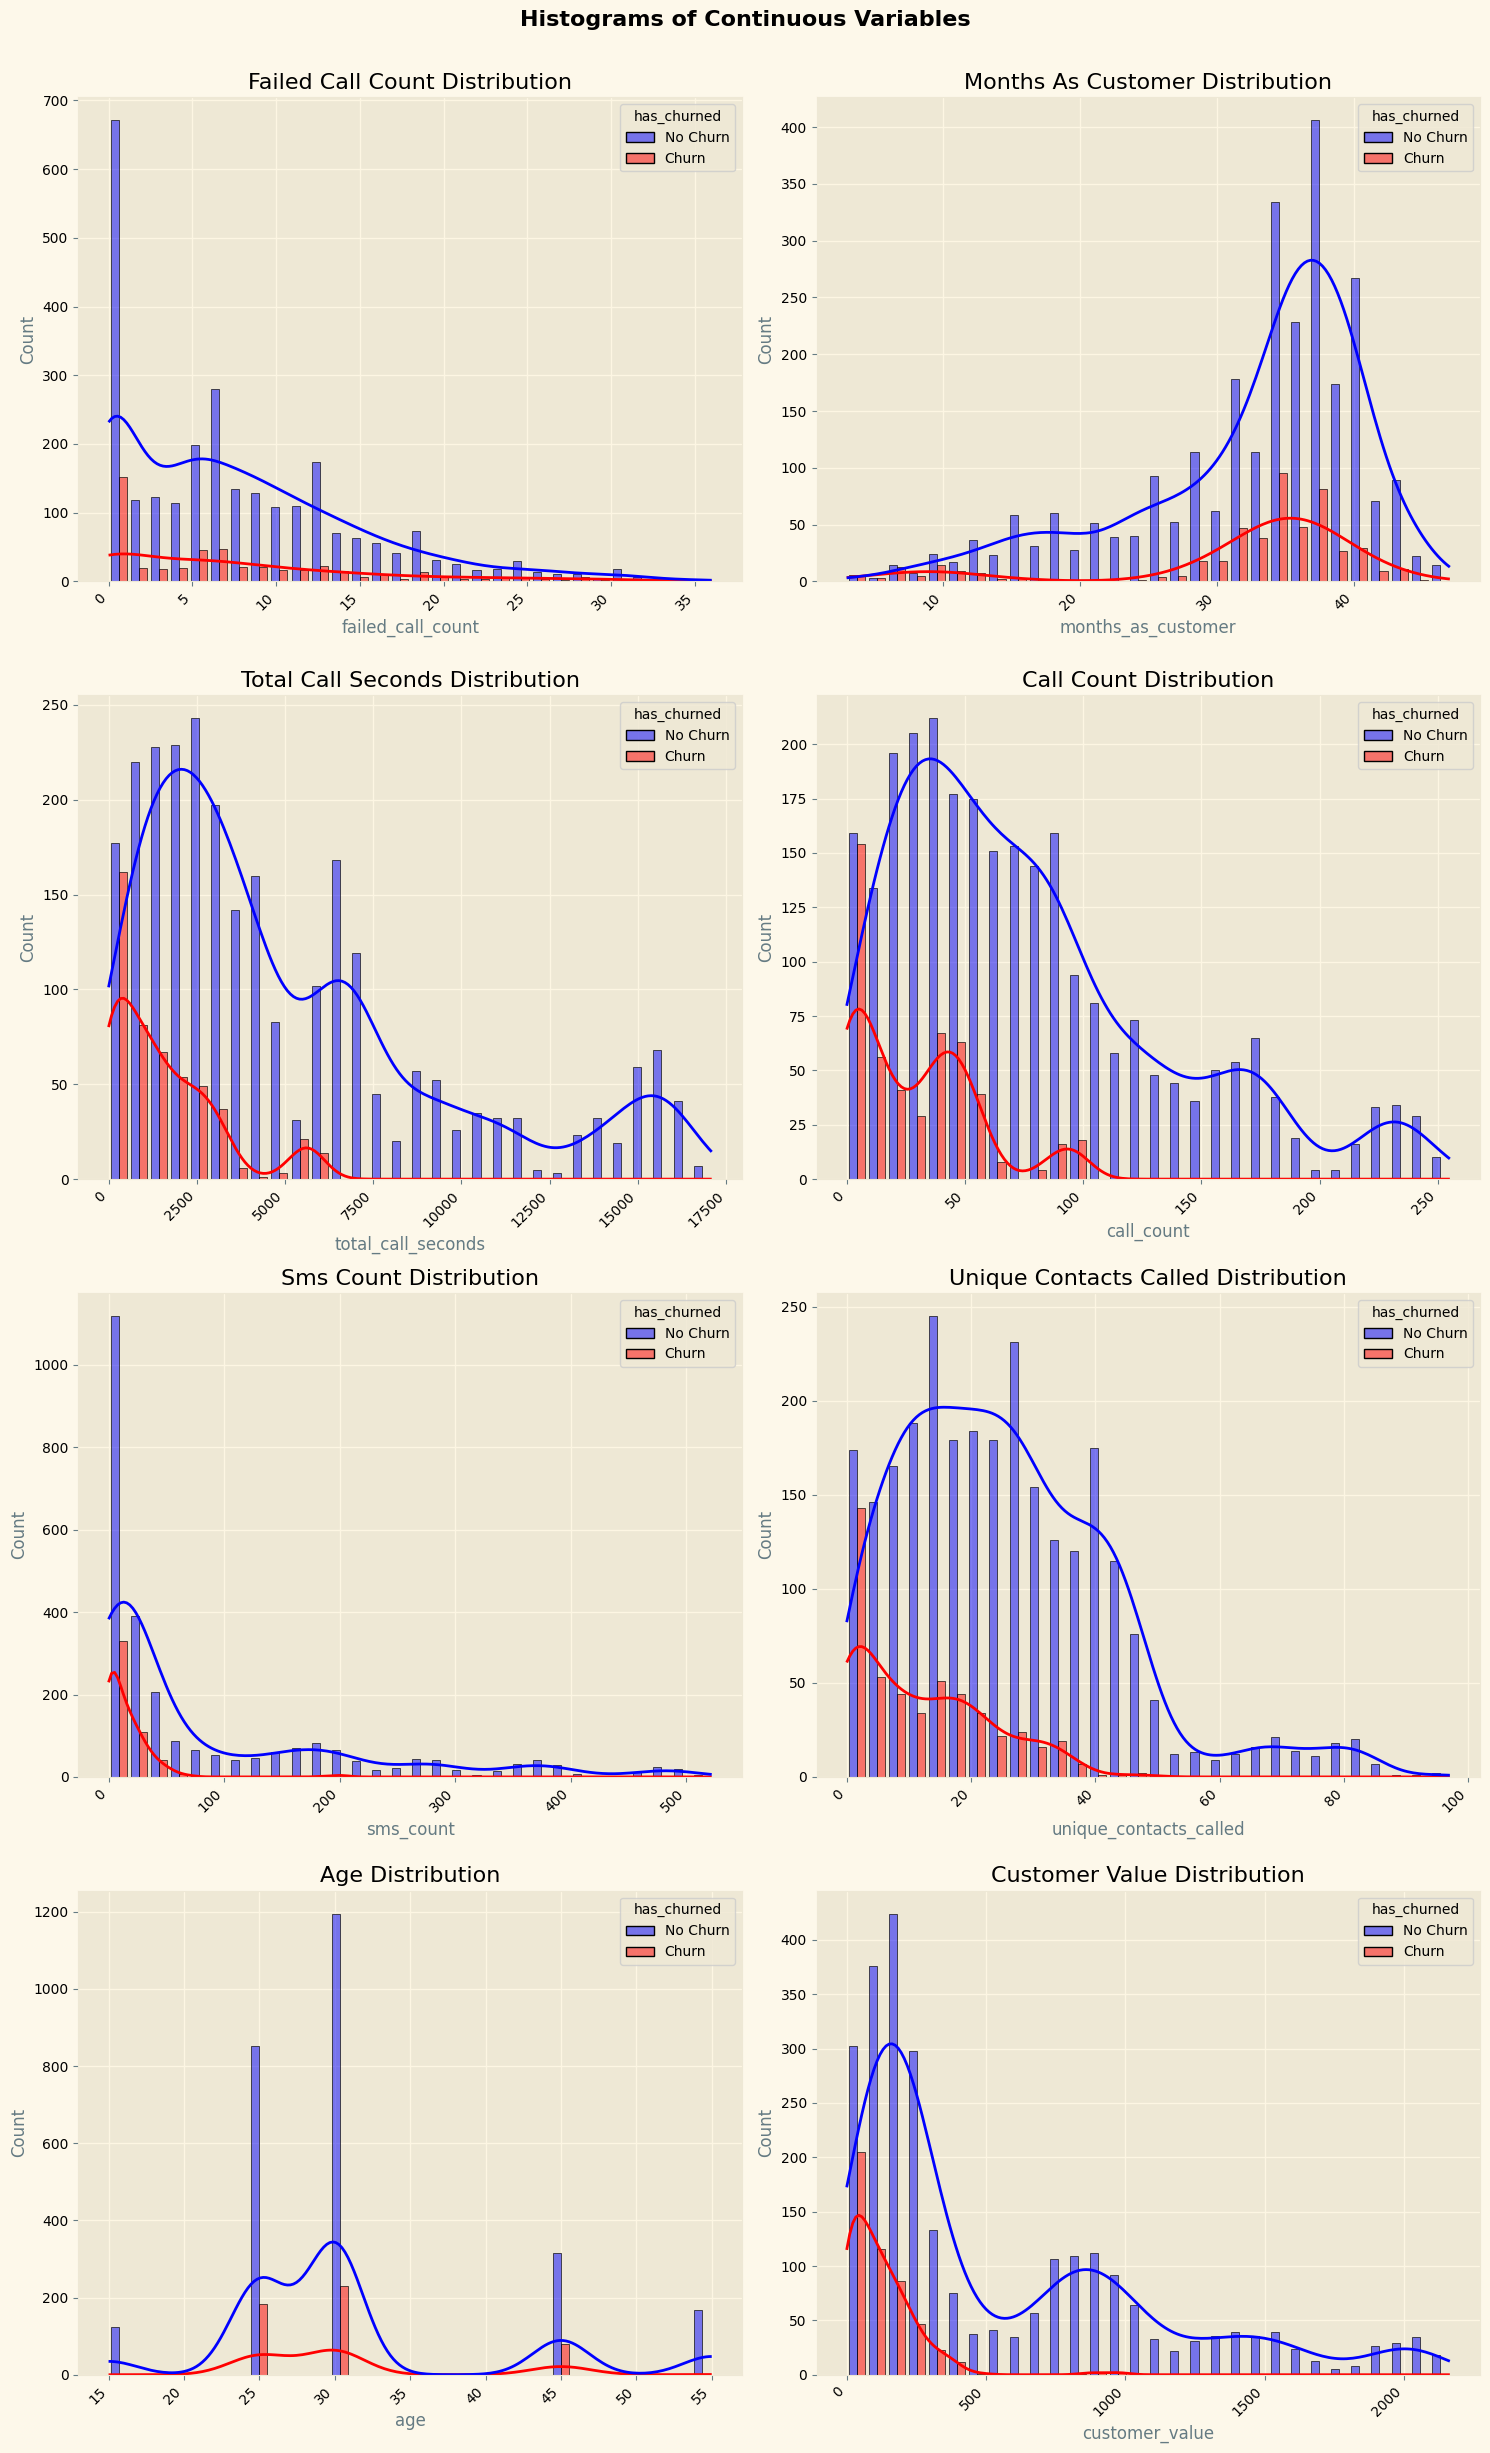

In [18]:
cols = df.describe().columns.tolist()
n = len(cols)

fig, axes = plt.subplots(n // 2, 2, figsize=(15, 3 * n), facecolor=fig_facecolor)

for i, col in enumerate(cols):
    r, c = divmod(i, 2)
    sns.histplot(
        data=df,
        x=col,
        hue='has_churned',
        bins=30,
        shrink=0.8,
        kde=True,
        multiple="dodge", 
        ax=axes[r, c],
        palette={'No Churn': 'blue', 'Churn': 'red'}
    )
    name = col.replace('_', ' ').title() + " Distribution"
    axes[r, c].set_title(name)

for ax in axes.flat:
    ax.set_facecolor(ax_facecolor)
    
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")
        label.set_color('black')
        
    for label in ax.get_yticklabels():
        label.set_color('black')

plt.tight_layout()
plt.suptitle("Histograms of Continuous Variables", fontsize=16, fontweight='bold', y=1.02)
plt.savefig('../Outputs/Figures/histplots_continuous_by_churn.png')
plt.show()

### Multivariable

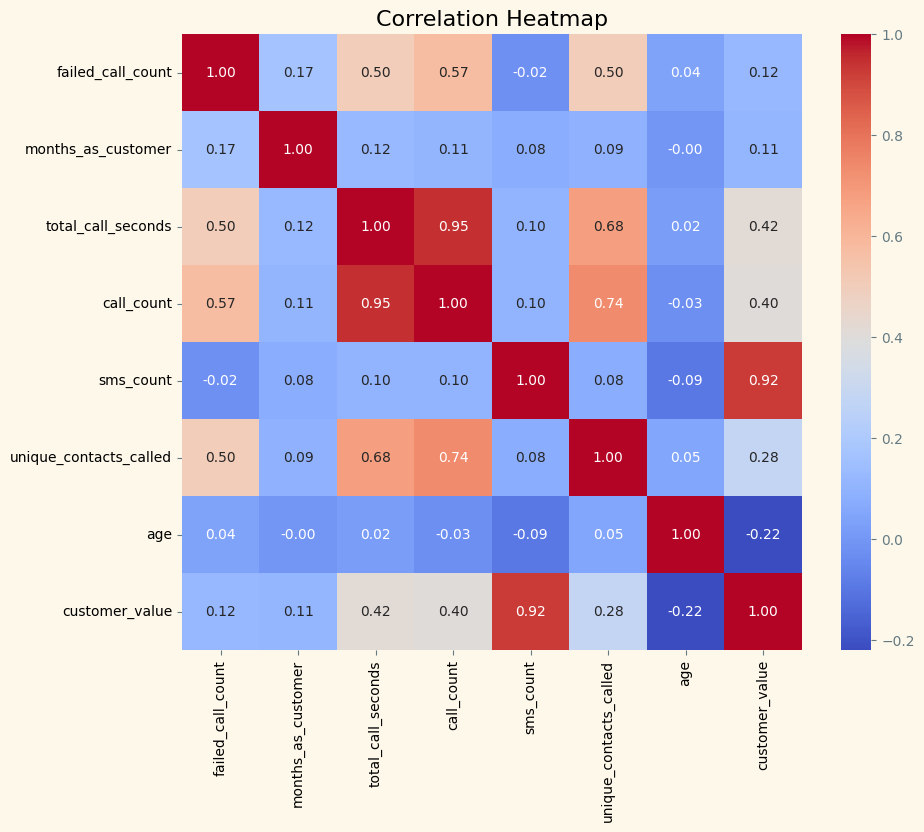

In [19]:
numeric_cols = df.select_dtypes(include='number')
corr = numeric_cols.corr()
corr.to_csv('../Outputs/Tables/correlation.csv')

plt.figure(figsize=(10, 8), facecolor=fig_facecolor)
ax = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
ax.set_facecolor(ax_facecolor)
for label in ax.get_xticklabels() + ax.get_yticklabels():
	label.set_color('black')
plt.title("Correlation Heatmap")
plt.savefig("../Outputs/Figures/correlation_heatmap.png")
plt.show()


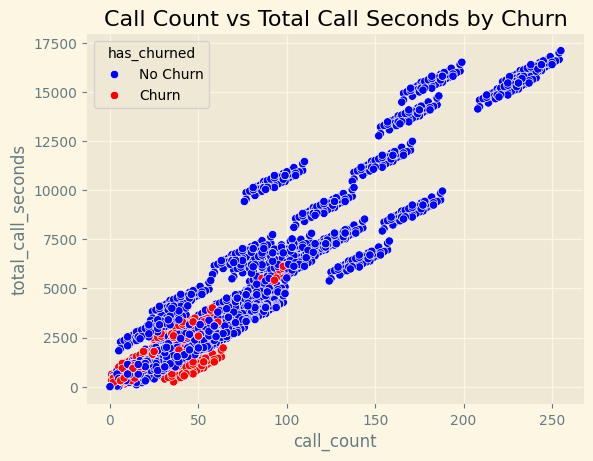

In [20]:
sns.scatterplot(
    data=df, 
    x='call_count', 
    y='total_call_seconds',                
    hue='has_churned', 
    palette={'No Churn': 'blue', 'Churn': 'red'}
)
plt.title("Call Count vs Total Call Seconds by Churn")
plt.savefig('../Outputs/Figures/call_count_and_call_seconds')
plt.show()


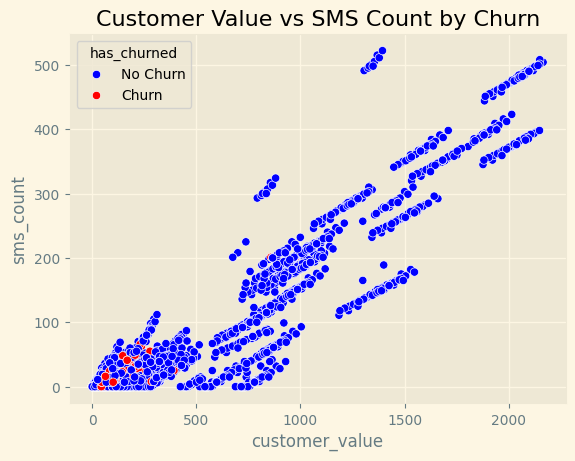

In [21]:
sns.scatterplot(
    data=df, 
    x='customer_value', 
    y='sms_count', 
    hue='has_churned', 
    palette={'No Churn': 'blue', 'Churn': 'red'}
)
plt.title("Customer Value vs SMS Count by Churn")
plt.savefig('../Outputs/Figures/customer_value_and_sms_count')
plt.show()

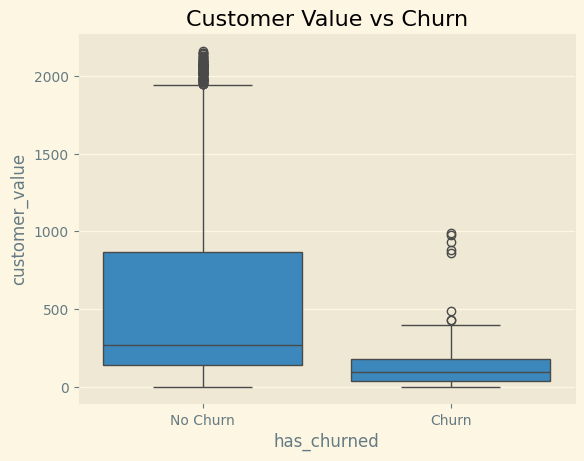

In [22]:
sns.boxplot(data=df, x='has_churned', y='customer_value')
plt.title("Customer Value vs Churn")
plt.savefig('../Outputs/Figures/boxplot_customer')
plt.show()
